In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [17]:
digits = load_digits()
dir(digits)# seeing what this datasets contains

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

**'data'** has numeric data of the image.Each number from each pixel of 8*8. We use **digits.data** to train the model

In [49]:
digits.data[0:2]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

Images has data that can show actual images in the plot. or can say **actual images**.IT has been arranged so that images can be plotted

In [47]:
digits.images[0:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

<Figure size 640x480 with 0 Axes>

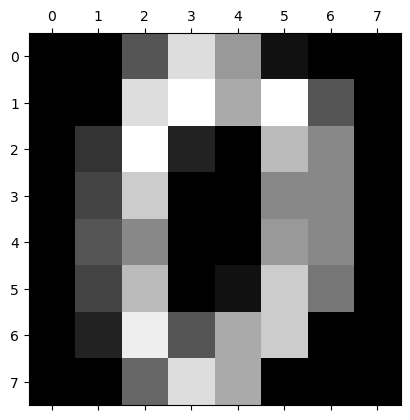

In [80]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

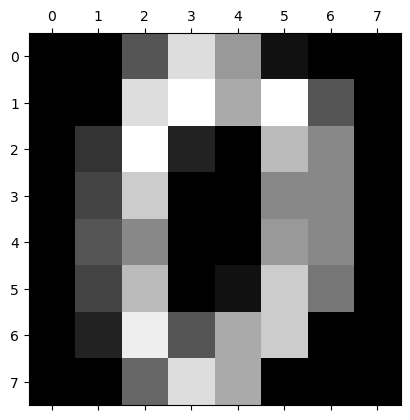

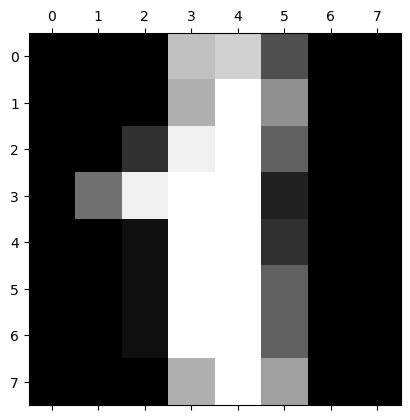

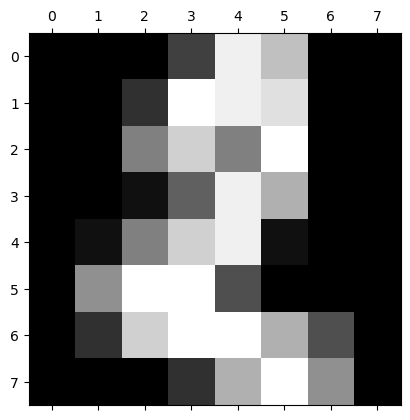

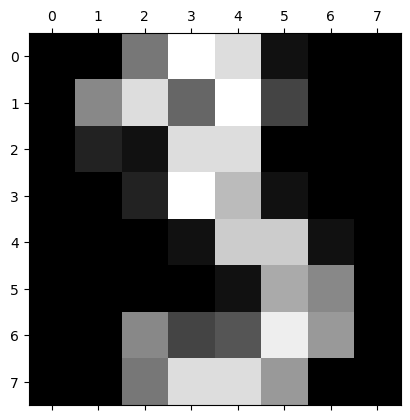

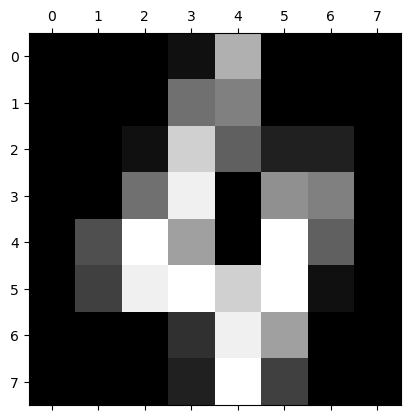

In [92]:
for i in range(5):
    plt.matshow(digits.images[i])#plotting the images
    plt.show()

In [90]:
digits.target[0:5] #this corresponds to the value of the respective images

array([0, 1, 2, 3, 4])

In [96]:
digits.target_names[0:5] #same as target

array([0, 1, 2, 3, 4])

### Now we can train the model using digits.data and digits.target
- data contains the pixel values of the each image
- target contains what the data corresponds to the value

In [103]:

from sklearn.model_selection import train_test_split

#### splitting into training and testesting data
- reason todo is to reduce biasness , to test the model in unseen data

In [123]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.2)# 20%test size and 80% training

In [125]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1437
360
1437
360


#### importing logistic regression and training the model from it

In [136]:
from sklearn.linear_model import LogisticRegression

In [144]:

model = LogisticRegression()
model.fit(x_train,y_train) #x_train contains array of pixels of each image. y_train contains the actual value corresponding to the images

C:\Samir\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
#seeing how accurate is the model
model.score(x_test,y_test) # from the x_test the y_prediction value is generated and compare it to the actual value y_test

0.9638888888888889

In [148]:
model.score(x_train,y_train)

1.0

### Predicting the Images


The Image is 


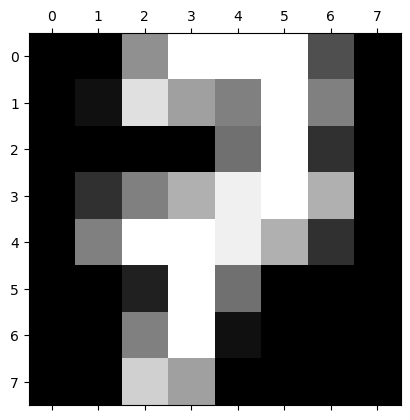

THe Predicted value by Logistic Regression Model is 


array([7])

In [163]:
print("The Image is ")
plt.matshow(digits.images[44])
plt.show()
print("THe Predicted value by Logistic Regression Model is ")
model.predict([digits.data[44]])

### We know from our operation data images of 0-5 contains the result 0-5. Now predicting from our Model

In [170]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Our model is predicting Accurate. But how we do know where it is not working.Overall feeling of the accuracy
- one of the way is **Confusion Matrix**

In [182]:
from sklearn.metrics import confusion_matrix

In [190]:
answerY_predicted = model.predict(x_test)
answerY_predicted #all answers predicted from the x_test

array([3, 5, 4, 8, 2, 9, 5, 3, 0, 8, 3, 6, 2, 5, 7, 9, 7, 4, 9, 3, 4, 1,
       7, 3, 8, 1, 0, 1, 8, 2, 1, 3, 5, 1, 6, 8, 5, 6, 5, 9, 9, 2, 1, 7,
       5, 8, 0, 1, 1, 9, 4, 9, 4, 1, 4, 9, 0, 4, 1, 6, 0, 4, 0, 0, 5, 6,
       5, 0, 6, 1, 6, 4, 0, 9, 4, 4, 9, 5, 0, 1, 4, 2, 5, 0, 9, 6, 0, 9,
       9, 7, 1, 2, 7, 8, 7, 2, 6, 9, 4, 8, 8, 2, 4, 2, 2, 9, 1, 0, 3, 9,
       9, 1, 9, 2, 8, 1, 3, 9, 3, 3, 4, 0, 6, 0, 7, 3, 1, 0, 0, 3, 1, 1,
       4, 8, 3, 7, 6, 2, 5, 8, 3, 6, 2, 3, 0, 1, 4, 6, 7, 3, 1, 7, 0, 7,
       7, 4, 8, 5, 6, 3, 2, 2, 7, 6, 0, 4, 1, 1, 5, 3, 1, 6, 0, 4, 1, 9,
       6, 5, 5, 2, 5, 3, 0, 8, 4, 8, 5, 9, 8, 2, 2, 7, 6, 5, 8, 2, 9, 5,
       1, 2, 3, 4, 9, 6, 1, 5, 7, 9, 2, 4, 1, 9, 7, 7, 6, 8, 7, 6, 0, 1,
       9, 4, 9, 2, 3, 2, 4, 4, 3, 7, 1, 3, 6, 8, 8, 5, 9, 7, 1, 1, 1, 8,
       7, 4, 6, 7, 4, 8, 9, 2, 6, 8, 3, 6, 3, 1, 3, 6, 6, 3, 3, 0, 0, 6,
       1, 5, 1, 9, 2, 8, 9, 8, 8, 3, 7, 4, 2, 2, 2, 9, 4, 5, 5, 2, 4, 0,
       6, 2, 5, 4, 5, 9, 2, 0, 8, 1, 4, 2, 3, 8, 1,

In [198]:
cm = confusion_matrix(y_test,answerY_predicted) #toook actual answer and compare it with predicted values
print("The confusio matrix is")
cm#it can be understand when visualize better

The confusio matrix is


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 30,  1],
       [ 1,  0,  0,  3,  0,  0,  0,  0,  0, 35]], dtype=int64)

In [200]:
import seaborn as sn

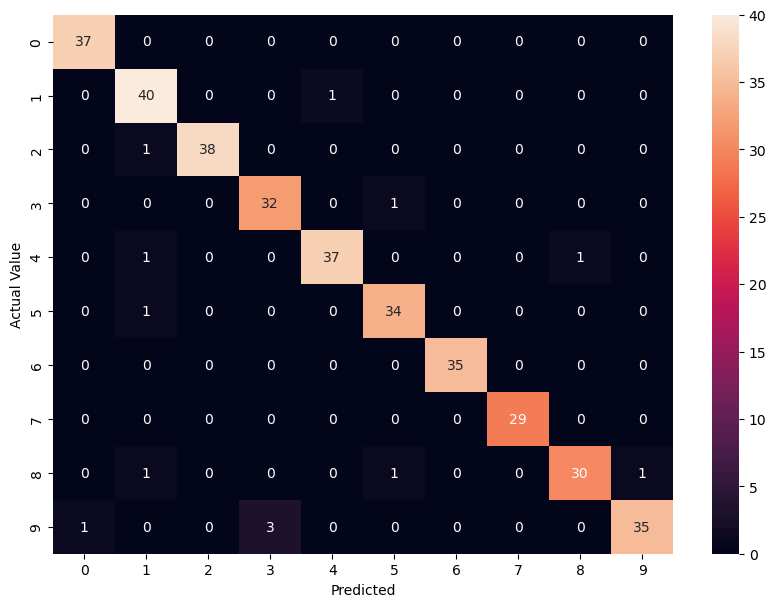

In [220]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)

plt.xlabel("Predicted")
plt.ylabel("Actual Value")
plt.show()

### The folloeing heatmap can be summarize as
- 37 times model predicted 0 when answer was zero and one time **actual value was 9** but it predicted zero
- and so following